In [1]:
import os
import sys
sys.path.insert(1, '../')
from datetime import datetime

import pandas as pd
import numpy as np
import gym
import gym_keygrid

from rl_research.algorithms import agents, train

folder_name = f"data/exp{datetime.now().strftime('%Y_%m_%d_%H%M')}"

agent_names = agents.keys()

scores = {agent_name: {} for agent_name in agent_names}
task_solved = {agent_name: [] for agent_name in agent_names}

grid_lengths = [10, 15, 20]
num_eps = [2000]
num_iter = 10

for i, (num_ep, grid_length) in enumerate(zip(num_eps, grid_lengths)):
    env = gym.make('keygrid-v0', grid_length=grid_length)
    #env.render()
    for it in range(num_iter):
        print(f'iteration {it}')

        for agent_name in agent_names:
            agent = train(env, agents[agent_name], num_ep, logs=True)
            key = (grid_length, it)
            scores[agent_name][key] = agent.scores
            task_solved[agent_name].append(agent.env_solved)
            print(agent_name, agent.env_solved, np.sum(agent.scores))

os.mkdir(folder_name)

for i, algo in enumerate(agent_names):
    df = pd.DataFrame.from_dict(scores[algo], orient='index').T
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    df.to_csv(f'{folder_name}/{algo}.csv', index=False)


df = pd.DataFrame.from_dict(task_solved, orient='columns')
df.to_csv(f'{folder_name}/results.csv', index=False)


/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [1]:
import os
import sys
sys.path.insert(1, '../')
from datetime import datetime

import pandas as pd
import numpy as np
import gym
import gym_keygrid

from rl_research.algorithms import agents
from rl_research.algorithms.training import train


folder_name = f"data/exp{datetime.now().strftime('%Y_%m_%d_%H%M')}"

agent_names = agents.keys()

scores = {agent_name: {} for agent_name in agent_names}
task_solved = {agent_name: [] for agent_name in agent_names}




/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:

grid_lengths = 5
num_eps = 200
num_iter = 10   

            

In [3]:
env = gym.make('keygrid-v0', grid_length=grid_lengths)       


You are using the KeyGridSparse environment with length 5


/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment keygrid-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API

In [5]:
agents

{'reinforce_st': rl_research.algorithms.reinforce_count_states.ReinforceCountState,
 'reinforce_seq': rl_research.algorithms.reinforce_count_seq.ReinforceCountSeq}

In [6]:
agents['reinforce_st']

rl_research.algorithms.reinforce_count_states.ReinforceCountState

In [4]:
agent = train(env, agents['reinforce_st'], num_eps, logs=True)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0) probas:  [0.33 0.33 0.33]
(0, 1) probas:  [0.35 0.32 0.33]
(1, 0) probas:  [0.33 0.33 0.33]
(1, 1) probas:  [0.35 0.32 0.33]
(2, 0) probas:  [0.33 0.33 0.34]
(2, 1) probas:  [0.35 0.32 0.34]
(3, 0) probas:  [0.33 0.33 0.34]
(3, 1) probas:  [0.34 0.31 0.34]
(4, 0) probas:  [0.33 0.33 0.34]
(4, 1) probas:  [0.34 0.31 0.35]
state  (0, 0)
reward  0


/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:196: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow 

AssertionError: Expects step result to be a tuple, actual type: <class 'list'>

In [5]:
agent_names = agents.keys()
for agent_name in agent_names:
    print(agent_name)  
    agent = train(env, agents[agent_name], num_eps, logs=True)

reinforce_st

****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0) probas:  [0.33 0.33 0.33]
(0, 1) probas:  [0.34 0.34 0.32]
(1, 0) probas:  [0.33 0.34 0.33]
(1, 1) probas:  [0.34 0.34 0.32]
(2, 0) probas:  [0.33 0.34 0.32]
(2, 1) probas:  [0.35 0.34 0.31]
(3, 0) probas:  [0.34 0.35 0.31]
(3, 1) probas:  [0.36 0.34 0.3 ]
(4, 0) probas:  [0.34 0.36 0.31]
(4, 1) probas:  [0.36 0.34 0.3 ]
state  (0, 0)
reward  0
state  (1, 0)
reward  0
state  (0, 0)
reward  0
state  (1, 0)
reward  0
state  (1, 0)
reward  0
state  (2, 0)
reward  0
state  (2, 0)
reward  0
state  (2, 0)
reward  0
state  (3, 0)
reward  0
state  (4, 0)
reward  0
state  (3, 0)
reward  0
state  (2, 0)
reward  0
state  (1, 0)
reward  0
state  (0, 0)
reward  0
state  (0, 0)
reward  0
state  (1, 0)
reward  0
state  (2, 0)
reward  0
state  (3, 0)
reward  0
state  (3, 1)
reward  0
state  (2, 1)
reward  0
Score: 0
% of visited states: 40.0%

Iterati

In [28]:
agents[agent_name]
agent = train(env,agents[agent_name] , 2000, logs=True)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0) probas:  [0.33 0.33 0.33]
(0, 1) probas:  [0.32 0.32 0.35]
(1, 0) probas:  [0.34 0.33 0.33]
(1, 1) probas:  [0.33 0.33 0.35]
(2, 0) probas:  [0.34 0.32 0.33]
(2, 1) probas:  [0.33 0.33 0.35]
(3, 0) probas:  [0.35 0.32 0.33]
(3, 1) probas:  [0.33 0.32 0.35]
(4, 0) probas:  [0.36 0.31 0.33]
(4, 1) probas:  [0.33 0.32 0.35]
Score: 50
% of visited states: 40.0%

Iteration:  1
Score: 0
% of visited states: 80.0%

Iteration:  2
Score: 0
% of visited states: 90.0%

Iteration:  3
Score: 0
% of visited states: 90.0%

Iteration:  4
Score: 50
% of visited states: 100.0%

Iteration:  5
Score: 0
% of visited states: 100.0%

Iteration:  6
Score: 0
% of visited states: 100.0%

Iteration:  7
Score: 0
% of visited states: 100.0%

Iteration:  8
Score: 0
% of visited states: 100.0%

Iteration:  9
Score: 50
% of visited states: 100.0%

Iteration:  10
Score: 0
% of vis

In [5]:
env.observation_space

Box(0.0, 4.0, (2,), float32)

In [26]:
agents[agent_name]

rl_research.algorithms.reinforce_count_states.ReinforceCountState

In [5]:
agent_names

dict_keys(['reinforce_st', 'reinforce_seq'])

In [6]:
scores

{'reinforce_st': {}, 'reinforce_seq': {}}

In [25]:
agent_names[agent_name]

TypeError: 'dict_keys' object is not subscriptable

In [7]:
task_solved

{'reinforce_st': [], 'reinforce_seq': []}

In [2]:
import os
import sys
sys.path.insert(1, '../')
from datetime import datetime

import pandas as pd
import numpy as np
import gym
import gym_keygrid

from rl_research.algorithms import agents, train


folder_name = f"data/exp{datetime.now().strftime('%Y_%m_%d_%H%M')}"

agent_names = agents.keys()

scores = {agent_name: {} for agent_name in agent_names}
task_solved = {agent_name: [] for agent_name in agent_names}

grid_length = 15
num_ep = 200
num_iter = 2

env = gym.make('keygrid-v0', grid_length=grid_length)
for it in range(num_iter):
    print(f'iteration {it}')

    for agent_name in agent_names:
        agent = train(env, agents[agent_name], num_ep)
        key = (grid_length, it)
        scores[agent_name][key] = agent.scores
        task_solved[agent_name].append(agent.env_solved)
        print(agent_name, agent.env_solved, np.sum(agent.scores))






KeyboardInterrupt: 

In [1]:
cd ..

/home/rmapkay/research_project


In [1]:

import os
import sys
sys.path.insert(1, '../rl_research')
from datetime import datetime

import pandas as pd
import numpy as np
import gym
import gym_keygrid
import rl_research

from rl_research.algorithms import agents, train
from rl_research.algorithms import ReinforceCountSeqEdited
from rl_research.utils import plot_policy, plot_states, plot_qtables, plot_state_freq, plot_scores

env = gym.make('keygrid-v0', grid_length=5)
#algorithms.reinforce_count_seq_edited.ReinforceCountSeqEdited
   
agent = train(env,ReinforceCountSeqEdited , 150, logs=True)
plot_scores(agent.scores)
agent.get_policy()
plot_policy(env, agent.pi, "REINFORCE seq edited")
plot_state_freq(agent.state_freq)
agent.get_proba()
            

KeyboardInterrupt: 

In [2]:
print(sys.path)

['/home/rmapkay/research_project/experiments', '../rl_research', '/usr/lib64/python36.zip', '/usr/lib64/python3.6', '/usr/lib64/python3.6/lib-dynload', '', '/home/rmapkay/Alex_env2/lib64/python3.6/site-packages', '/home/rmapkay/research_project/gym-envs/gym-keygrid', '/home/rmapkay/Alex_env2/lib/python3.6/site-packages', '/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/IPython/extensions', '/home/rmapkay/.ipython']


In [2]:
cd ..

/home/rmapkay/research_project


In [3]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(1, "../../")
import matplotlib.pyplot as plt
import matplotlib

from rl_research.utils import plot_scores_grid

In [4]:
exp = ['gridlength10', 'gridlength15', 'gridlength20_2']
exp_map = {
    'gridlength10': '10',
    'gridlength15': '15',
    'gridlength20_2': '20'
}

In [5]:
#u must be in this directory /home/rmapkay/research_project/experiments
algos = ['reinforce', 'reinforce_st', 'reinforce_seq', 'reinforce_seq_edited']
mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'./experiments/data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [6]:
pwd

'/home/rmapkay/research_project'

In [6]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

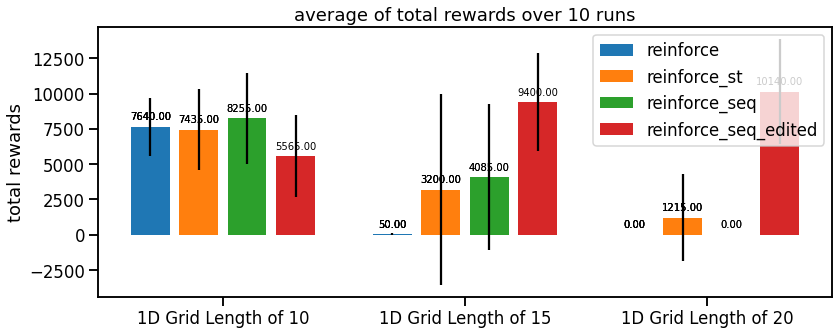

In [7]:
labels = [f'1D Grid Length of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    #ax.bar_label(rect, padding=3)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  size=10,textcoords = 'offset points')
    #ax.annotate(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()

/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment keygrid-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API

You are using the KeyGridSparse environment with length 10
iteration 0

****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0) probas:  [0.33 0.33 0.33]
(0, 1) probas:  [0.34 0.32 0.34]
(1, 0) probas:  [0.34 0.33 0.33]
(1, 1) probas:  [0.34 0.32 0.34]
(2, 0) probas:  [0.34 0.33 0.33]
(2, 1) probas:  [0.34 0.32 0.34]
(3, 0) probas:  [0.34 0.33 0.33]
(3, 1) probas:  [0.34 0.32 0.34]
(4, 0) probas:  [0.34 0.33 0.33]
(4, 1) probas:  [0.34 0.32 0.34]
(5, 0) probas:  [0.34 0.33 0.33]
(5, 1) probas:  [0.35 0.32 0.34]
(6, 0) probas:  [0.34 0.33 0.33]
(6, 1) probas:  [0.35 0.31 0.34]
(7, 0) probas:  [0.35 0.33 0.33]
(7, 1) probas:  [0.35 0.31 0.34]
(8, 0) probas:  [0.35 0.33 0.32]
(8, 1) probas:  [0.35 0.31 0.34]
(9, 0) probas:  [0.35 0.33 0.32]
(9, 1) probas:  [0.35 0.31 0.34]
| A | * | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | *

/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/utils/passive_env_checker.py:196: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow 


Iteration:  1
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| A | * | * | * | * | * | * | K | * | * | 
| A | * | * | * | * | * | * | K | * | * | 
| A | * | * | * | * | * | * | K | * | * | 
| * | A | * | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | * | A | * | * | * | * | K | * | * | 
| * | * | * | A | * | * | * | K | * | * | 
| * | * | * | * | A | * | * | K | * | * | 
| * | * | * | * | * | A | * | K | * | *

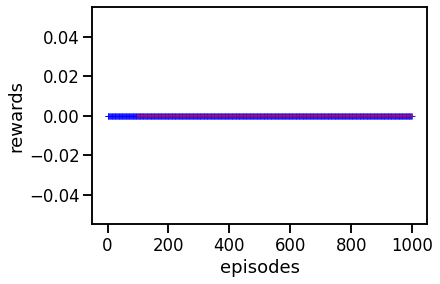

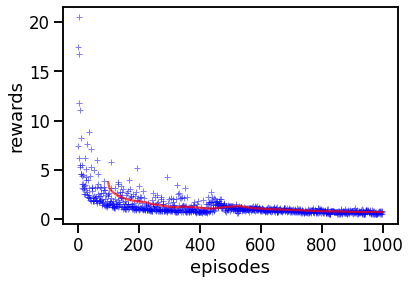

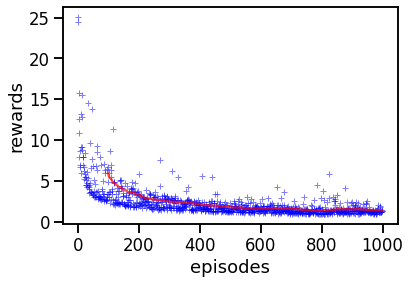

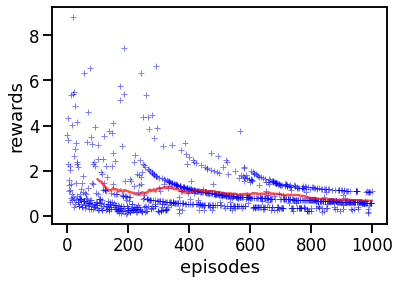

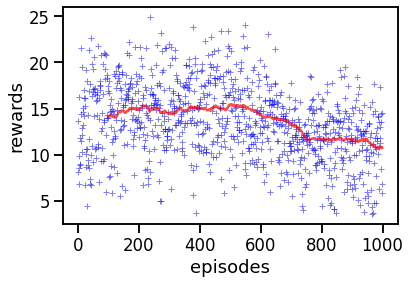

In [3]:
import os
import sys
# sys.path.insert(1, '../')

sys.path.insert(1, '../research_project')
from datetime import datetime
import pandas as pd
import numpy as np
import gym
import gym_keygrid

from rl_research.algorithms import agents, train
from rl_research.utils import plot_scores

agent_names = agents.keys()


def run_algorithms(keygrid_v,grid_length,num_ep,num_iter,beta_exp=1):
    folder_name='./experiments/data/%s_grid%s_ep%s_beta%s' %(keygrid_v,grid_length,num_ep,beta_exp)
    os.mkdir(folder_name)
    scores = {agent_name: {} for agent_name in agent_names}
    iscores={agent_name: {} for agent_name in agent_names}
    task_solved = {agent_name: [] for agent_name in agent_names}
    env = gym.make(keygrid_v, grid_length=grid_length) # if u want to test the 2d env
    #env = gym.make('keygrid-v0', grid_length=grid_length)
    #env.render()
    for it in range(num_iter):
        print(f'iteration {it}')

        for agent_name in agent_names:
            agent = train(env, agents[agent_name], num_ep, logs=True,beta_exp=beta_exp)
            key = (grid_length, it)
            print('key ',key)
            scores[agent_name][key] = agent.scores
            iscores[agent_name][key]=agent.intrinsic_scores
            task_solved[agent_name].append(agent.env_solved)
            print(agent_name, agent.env_solved, np.sum(agent.scores))
            fig=plot_scores(agent.intrinsic_scores, agent.space_visitation)
            fig.savefig('khara.pdf')


    for i, algo in enumerate(agent_names):
        df = pd.DataFrame.from_dict(scores[algo], orient='index').T
        df.columns = pd.MultiIndex.from_tuples(df.columns)
        df.to_csv(f'{folder_name}/{algo}.csv', index=False)
    df = pd.DataFrame.from_dict(task_solved, orient='columns')
    df.to_csv(f'{folder_name}/results.csv', index=False)
#####
# grid_lengths=[10,15,20,25,30]
# num_eps=[2000,3000,4000,5000]
# beta_exp=[0.1,0.3,0.5,0.7,0.9]
# runs=100

grid_lengths=[10]
num_eps=[1000]
beta_exp=0.9
runs=1

for grid_length in grid_lengths:
    for num_ep in num_eps:
        run_algorithms('keygrid-v0',grid_length,num_ep,runs,beta_exp=beta_exp)

In [2]:
cd ..

/home/rmapkay/research_project
